In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt

from code import Outputs
sys.path.append("../../benchmark/")
from utilities import complete_panel, myblue, myorange, myred, lightgray, darkgray

# Velocity distribution

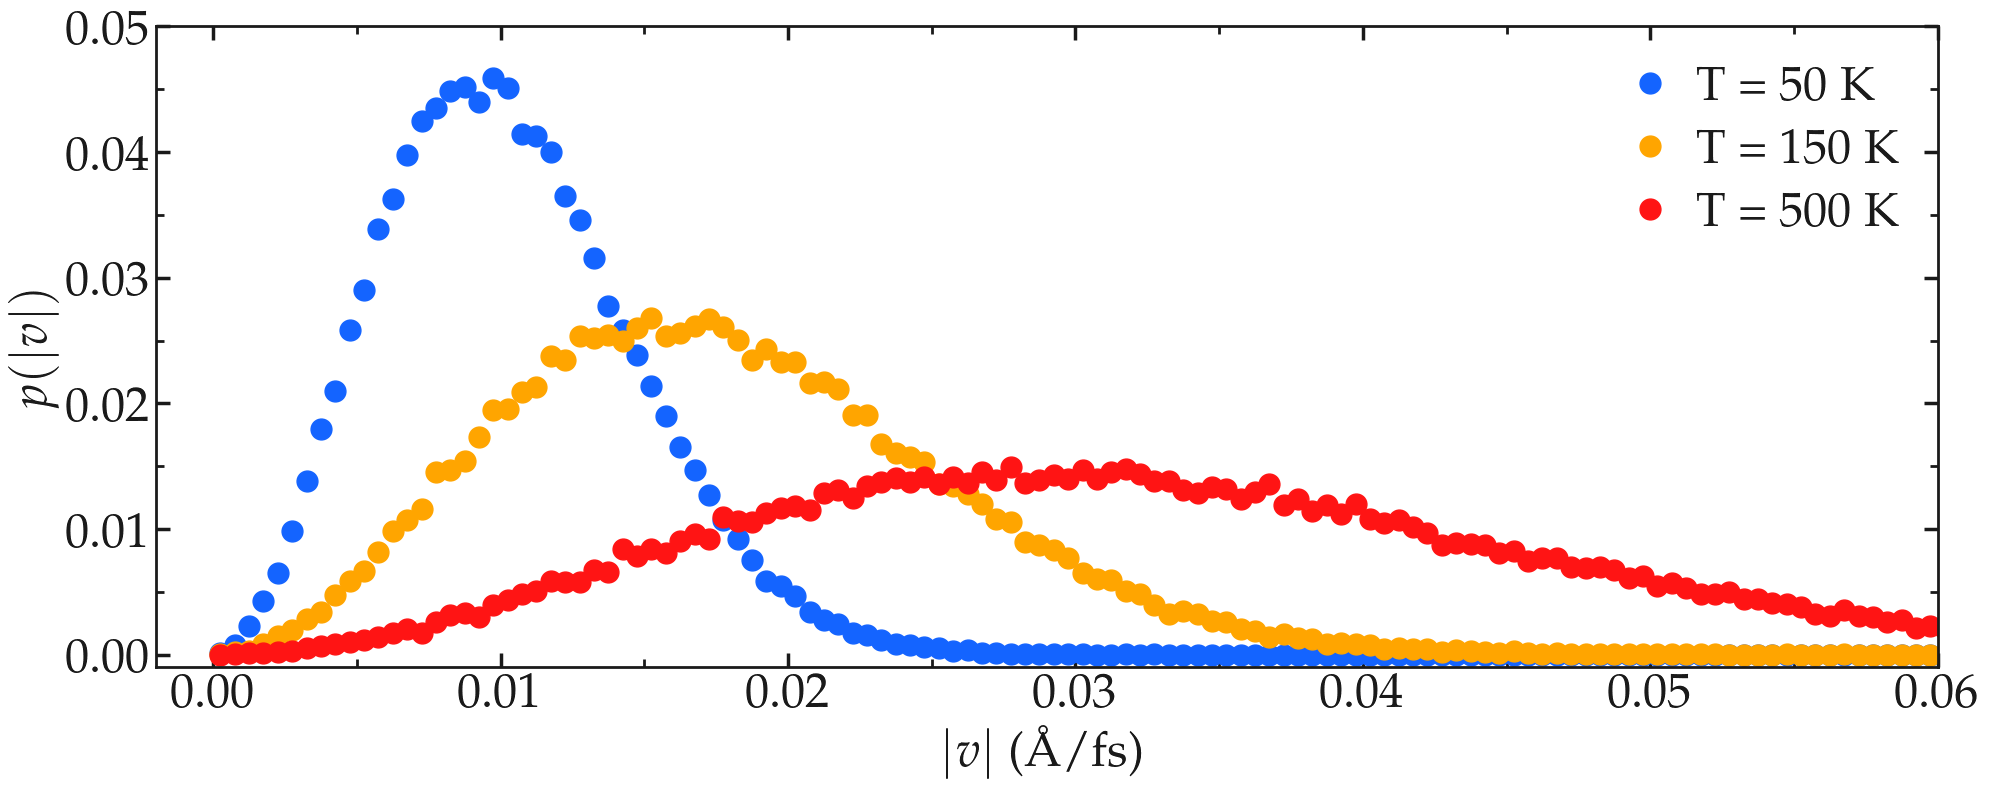

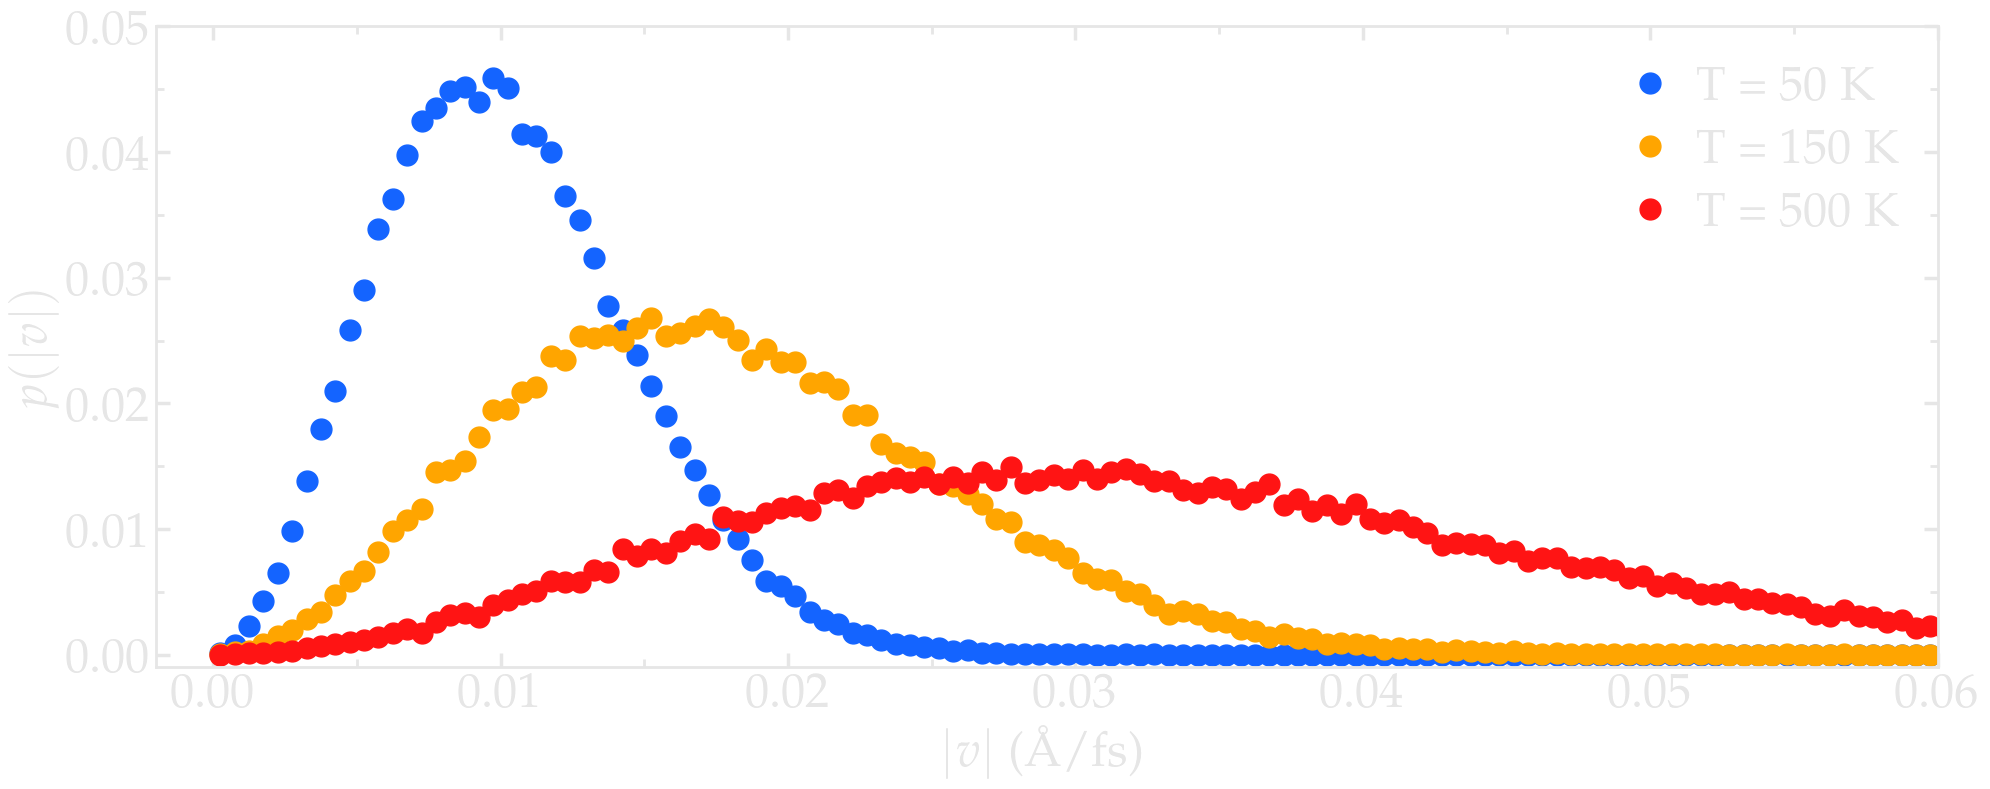

In [2]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):

    fig = plt.figure(figsize=(20,8))

    ax = []
    n = 0
    l_tot = 1
    c_tot = 1

    x_boundaries = -0.002, 0.06
    x_ticks = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
    y_boundaries = -0.001, 0.05
    y_ticks = [0, 0.01, 0.02, 0.03, 0.04, 0.05]

    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))

    for temperature, color in zip([50, 150, 500], [myblue, myorange, myred]):
        x = Outputs(number_atoms=50000,
                    Lx=12,
                    desired_temperature=temperature,
                    seed=69817,
                    )
        x.write_lammps_data()

        velocity = x.atoms_velocities*x.reference_distance/x.reference_time
        norm_velocity = np.sqrt(velocity.T[0]**2 + velocity.T[1]**2 + velocity.T[2]**2)

        proba, vel = np.histogram(norm_velocity, bins=200, range=(0, 0.1))
        vel = (vel[1:]+vel[:-1])/2
        proba = proba/np.sum(proba)

        ax[-1].plot(vel, proba, 'o', color=color, markersize=15, label=r'T = '+str(temperature)+' K')

    plt.xlim(x_boundaries)
    plt.xticks(x_ticks)
    plt.ylim(y_boundaries)
    plt.yticks(y_ticks)

    complete_panel(ax[-1], r'$|v|$ (\AA/fs)', r'$p (|v|)$', legend=True, gray=mygray)

    fig.tight_layout()
    if mode == 'light':
        plt.savefig('../../docs/source/_static/chapter1/velocity-distributions-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
    else:
        plt.savefig('../../docs/source/_static/chapter1/velocity-distributions-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)        
    plt.show()